In [3]:
import pandas as pd
import numpy as np

samples = pd.read_csv('samples.csv')


,arc,naa,nbv,nlth,nvi
3582,E junto a ele assentará as suas tendas a tribo...,E junto a ele acampará a tribo de Simeão; e Se...,A tribo de Simeão acampará ao lado de Rúben. O...,Ao lado deles acampará o exército da tribo de ...,A tribo de Simeão acampará ao lado de Rúben. O...
16398,"Pela longanimidade se persuade o príncipe, e a...","Com paciência se convence um príncipe, e a lín...",Seja paciente e você persuadirá o príncipe; fa...,A paciência convence até as autoridades; a per...,Com muita paciência pode-se convencer a autori...
9004,"E sucedeu que, à sétima vez, disse: Eis aqui u...",Na sétima vez o servo disse: — Eis que se leva...,"Finalmente, na sétima vez, o servo exclamou: “...","Na sétima vez, ele voltou e disse: — Eu vi sub...",Na sétima vez o servo disse: “Uma nuvem tão pe...
26931,"E, sendo-me notificado que os judeus haviam de...",Sendo eu informado de que ia haver uma embosca...,Mas quando fui informado de uma conspiração pa...,Quando fui informado de que havia um plano par...,Quando fui informado de que estava sendo prepa...
26955,os quais convinha que estivessem presentes per...,os quais deviam comparecer diante do senhor e ...,Mas estavam lá alguns judeus da província da Á...,Porém alguns judeus da província da Ásia estav...,Mas há alguns judeus da província da Ásia que ...
...,...,...,...,...,...
23907,"Quando, pois, vos conduzirem para vos entregar...","— Quando, pois, levarem vocês para os entregar...",Mas quando vocês forem presos e submetidos a j...,Quando prenderem e entregarem vocês às autorid...,Sempre que forem presos e levados a julgamento...
22949,"Assim não são mais dois, mas uma só carne. Por...","De modo que já não são mais dois, porém uma só...","Assim, eles não mais serão dois, mas sim uma s...","Assim já não são duas pessoas, mas uma só. Por...","Assim, eles já não são dois, mas sim uma só ca..."
13992,"Porque te não comprazes em sacrifícios, senão ...",Pois não te agradas de sacrifícios; do contrár...,O Senhor não se agrada de sacrifícios nem de o...,Tu não queres que eu te ofereça sacrifícios; t...,Não te deleitas em sacrifícios nem te agradas ...
28297,"Mas agora, conhecendo a Deus ou, antes, sendo ...","Mas agora que vocês conhecem a Deus, ou melhor...","E agora que conheceram a Deus, ou melhor, agor...","Mas, agora que vocês conhecem a Deus, ou melho...","Mas agora, conhecendo a Deus, ou melhor, sendo..."


In [4]:
for col in samples.columns:
  np.savetxt(col+'.txt', samples[col].to_numpy(), fmt='%s')

In [5]:
from spacy.lang.pt import Portuguese
nlp = Portuguese()
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [6]:
def get_tokens_per_sent(sent_list):
  print(len(sent_list[0]))

In [7]:
!mkdir samples/

In [27]:
report_df = []

for col in samples.columns:
  sentence_list = []
  for verse in samples[col].to_numpy():
    sentence_list.extend(list(nlp(verse).sents))
  
  report_df.extend(list(map(lambda sent: {"version": col.upper(), "tokens per sentence":len(sent)}, sentence_list)))
  np.savetxt(f'samples/{col}.txt', sentence_list, fmt='%s')



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [34]:
samples.to_csv('samples.csv')

In [28]:
report_df = pd.DataFrame(report_df)
report_df

,version,tokens per sentence
0,ARC,27
1,ARC,19
2,ARC,15
3,ARC,27
4,ARC,26
...,...,...
2188,NVI,11
2189,NVI,16
2190,NVI,31
2191,NVI,8


In [31]:
samples1 = report_df.loc[(report_df['version']!='NLTH') & (report_df['version']!='NVI')]
samples1

,version,tokens per sentence
0,ARC,27
1,ARC,19
2,ARC,15
3,ARC,27
4,ARC,26
...,...,...
1258,NBV,11
1259,NBV,12
1260,NBV,16
1261,NBV,39


In [32]:
samples2 = report_df.loc[(report_df['version']=='NLTH') | (report_df['version']=='NVI')]
samples2

,version,tokens per sentence
1263,NLTH,12
1264,NLTH,21
1265,NLTH,14
1266,NLTH,27
1267,NLTH,33
...,...,...
2188,NVI,11
2189,NVI,16
2190,NVI,31
2191,NVI,8


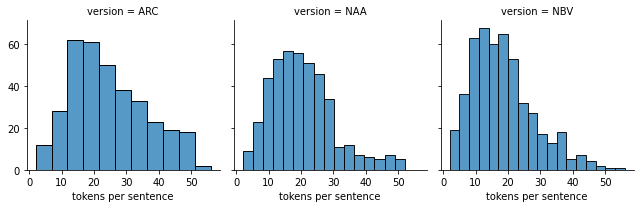

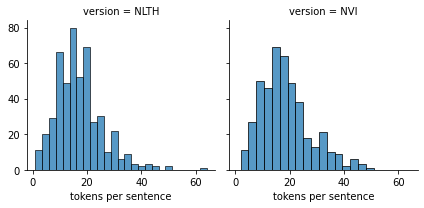

In [33]:
import seaborn as sns

g = sns.FacetGrid(samples1, col="version")
g.map(sns.histplot, "tokens per sentence")
g = sns.FacetGrid(samples2, col="version")
g.map(sns.histplot, "tokens per sentence")

In [26]:
!zip -r samples.zip samples/

  adding: samples/ (stored 0%)
  adding: samples/nbv.txt (deflated 59%)
  adding: samples/nlth.txt (deflated 60%)
  adding: samples/nvi.txt (deflated 58%)
  adding: samples/arc.txt (deflated 59%)
  adding: samples/naa.txt (deflated 60%)
